# Chapter 6: The Least Squares Estimator

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch06_visual_summary.jpg" alt="Chapter 06 Visual Summary" width="65%">

This notebook provides an interactive introduction to the statistical properties of the OLS estimator. All code runs directly in Google Colab without any local setup.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch06_The_Least_Squares_Estimator.ipynb)

## Chapter Overview

### Introduction

Understanding the properties of the Ordinary Least Squares (OLS) estimator is fundamental to econometric inference. While Chapter 5 showed *how* to estimate regression models, this chapter explains *why* OLS works and *when* we can trust its results. We examine the statistical properties that make OLS the standard estimation method in econometrics: unbiasedness, efficiency, and asymptotic normality.

A crucial concept is the distinction between the **population regression** (the true relationship we want to learn about) and the **sample regression** (our estimate from limited data). Different samples yield different estimates—this sampling variability is inevitable but quantifiable. By understanding how OLS estimates vary across samples, we can construct confidence intervals and test hypotheses about economic relationships.

This chapter uses Monte Carlo simulations and real-world examples to demonstrate OLS properties empirically, connecting abstract statistical theory to tangible patterns in data.

### What You'll Learn

In this chapter, you will:
- Distinguish between the population regression line (β₁ + β₂x) and the sample regression line (b₁ + b₂x)
- Understand the conditional mean E[y|x] and the error term u = y - E[y|x]
- Differentiate between the unobserved error term (u) and the observed residual (e)
- Apply the four key OLS assumptions: correct model, mean-zero errors, homoskedasticity, and independence
- Calculate the variance and standard error of the OLS slope coefficient b₂
- Explain why b₂ is an unbiased estimator of β₂ under assumptions 1-2
- Compute the standard error of the regression (sₑ) and use it to estimate precision
- Understand when OLS estimates are more precise (good fit, many observations, scattered regressors)
- Apply the Central Limit Theorem to show b₂ is approximately normally distributed for large samples
- Recognize that OLS is the Best Linear Unbiased Estimator (BLUE) under standard assumptions
- Conduct Monte Carlo simulations to demonstrate sampling distributions
- Interpret sampling variability and its implications for statistical inference

### Dataset Used

**Primary dataset:**
- **Convergence Clubs** (Mendez 2020): 108 countries, 1990-2014
  - Variables: Real GDP per capita (rgdppc), labor productivity, capital per worker (rk)
  - Used in Case Study: Sampling variability in productivity-capital regressions
  - Demonstrates OLS properties with real economic data

**Supporting examples:**
- **Generated data**: Computer-simulated samples from known DGP (y = 1 + 2x + u)
- **1880 U.S. Census**: Finite population sampling demonstration

### Chapter Outline

**6.1 Population and Sample Models** - Distinguish between population parameters (β₁, β₂) and sample estimates (b₁, b₂); understand error terms vs. residuals

**6.2 Examples of Sampling from a Population** - Generated data and census sampling demonstrations showing how estimates vary across samples

**6.3 Properties of the Least Squares Estimator** - Unbiasedness (E[b₂] = β₂), variance formulas, asymptotic normality, and BLUE property

**6.4 Estimators of Model Parameters** - Calculating standard errors, understanding degrees of freedom, factors affecting precision

**6.5 Case Studies** - Empirical investigation of sampling variability using convergence clubs data; Monte Carlo with real economic data

**6.6 Key Takeaways** - Comprehensive chapter summary organized by major themes

**6.7 Practice Exercises** - Hands-on problems reinforcing OLS properties, standard errors, and interpretation

---


## Setup

First, we import the necessary Python packages and configure the environment for reproducibility. All data will stream directly from GitHub.

In [ ]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("=" * 70)
print("CHAPTER 6: THE LEAST SQUARES ESTIMATOR")
print("=" * 70)
print("\nSetup complete! Ready to explore OLS properties.")

CHAPTER 6: THE LEAST SQUARES ESTIMATOR

Setup complete! Ready to explore OLS properties.


## 6.1 Population and Sample Models

Understanding the relationship between population and sample is crucial for statistical inference.

**Population model:**

The population conditional mean is assumed to be linear:

$$E[y | x] = \beta_1 + \beta_2 x$$

where:
- $\beta_1$ and $\beta_2$ are **unknown population parameters**
- $E[y|x]$ is the expected value of $y$ for a given value of $x$

**Error term:**

Individual observations deviate from the population line:

$$y = \beta_1 + \beta_2 x + u$$

where $u$ is the **error term** with:
- $E[u | x] = 0$ (errors average to zero)
- $\text{Var}[u | x] = \sigma_u^2$ (constant variance - homoskedasticity)

**Sample model:**

From a sample of data, we estimate:

$$\hat{y} = b_1 + b_2 x$$

where:
- $b_1$ and $b_2$ are **sample estimates** of $\beta_1$ and $\beta_2$
- Different samples produce different estimates

**Crucial distinction: Error vs. Residual**

- **Error** ($u$): Deviation from unknown population line (unobservable)
- **Residual** ($e$): Deviation from estimated sample line (observable)

$$e_i = y_i - \hat{y}_i = y_i - (b_1 + b_2 x_i)$$

**Key insight:** The sample regression line $\hat{y} = b_1 + b_2 x$ is our best estimate of the population line $E[y|x] = \beta_1 + \beta_2 x$, but $b_1 \neq \beta_1$ and $b_2 \neq \beta_2$ due to sampling variability.

> **Key Concept**: The population regression model E[y|x] = β₁ + β₂x describes the true relationship with unknown parameters β₁ and β₂. The sample regression ŷ = b₁ + b₂x estimates this relationship from data. Different samples yield different estimates due to sampling variability, but on average, OLS estimates equal the true parameters (unbiasedness).



## 6.2 Examples of Sampling from a Population

We examine two examples to understand sampling variability:

1. **Generated data**: Computer-simulated samples from an explicit model $y = 1 + 2x + u$
2. **Census data**: Samples from the 1880 U.S. Census (a finite population)

In both cases:
- We know the true population parameters
- Different samples yield different estimates
- The distribution of estimates is approximately normal
- On average, estimates equal the true parameters (unbiasedness)

> **Key Concept**: The error term u = y - E[y|x] is the deviation from the unknown population line and is unobservable. The residual e = y - ŷ is the deviation from the estimated sample line and is observable. This crucial distinction underlies all statistical inference: we use residuals (e) to learn about errors (u).



### Example 1: Generated Data from Known Model

**Data Generating Process (DGP):**

$$y = 1 + 2x + u, \quad u \sim N(0, \sigma_u^2 = 4)$$

This means:
- True intercept: $\beta_1 = 1$
- True slope: $\beta_2 = 2$
- Error standard deviation: $\sigma_u = 2$

In [ ]:
print("=" * 70)
print("6.2 EXAMPLES OF SAMPLING FROM A POPULATION")
print("=" * 70)

# Read in generated data
data_gen = pd.read_stata(GITHUB_DATA_URL + 'AED_GENERATEDDATA.DTA')

print("\nGenerated data summary:")
data_summary = data_gen.describe()
print(data_summary)

print("\nFirst 10 observations (Table 6.1):")
print(data_gen.head(10))

6.2 EXAMPLES OF SAMPLING FROM A POPULATION

Generated data summary:
              x   Eygivenx         u         y
count  5.000000   5.000000  5.000000  5.000000
mean   3.000000   7.000000 -1.031908  5.968092
std    1.581139   3.162278  1.753559  1.897129
min    1.000000   3.000000 -2.506667  4.493333
25%    2.000000   5.000000 -2.390764  4.681283
50%    3.000000   7.000000 -1.633280  4.689889
75%    4.000000   9.000000 -0.318717  7.366720
max    5.000000  11.000000  1.689889  8.609236

First 10 observations (Table 6.1):
     x  Eygivenx         u         y
0  1.0       3.0  1.689889  4.689889
1  2.0       5.0 -0.318717  4.681283
2  3.0       7.0 -2.506667  4.493333
3  4.0       9.0 -1.633280  7.366720
4  5.0      11.0 -2.390764  8.609236


### Figure 6.2 Panel A: Population Regression Line

The population regression line represents $E[y|x] = 1 + 2x$. Points scatter around this line due to the error term $u$.

---

**Transition Note:** We've established the theoretical distinction between population and sample regression models. Now we'll see this distinction in action through simulations and real census data, demonstrating how OLS estimates vary across samples while remaining centered on true parameters.



## Interpreting the Population Regression Results

**What this tells us:**

The population regression **E[y|x] = 1 + 2x** is perfectly estimated because we constructed the variable `Eygivenx` directly from this formula. Notice:

- **Intercept coefficient = 1.0000** (exactly)
- **Slope coefficient = 2.0000** (exactly)
- **R² = 1.000** (perfect fit)
- **Standard errors ≈ 0** (essentially zero)

This represents the **true** relationship between x and y in the population, before any random error is added.

**Key concept**: The population regression line shows the **expected value** (average) of y for each value of x. Individual observations deviate from this line due to the random error term u, which has mean zero but individual realizations that are positive or negative.

### Figure 6.2 Panel B: Sample Regression Line

The sample regression line is our estimate from the observed data. Note that it differs from the population line due to sampling variability.

## Interpreting the Sample Regression Results

**What this tells us:**

The sample regression estimates **ŷ = 2.81 + 1.05x** from the actual observed data (which includes random errors). Notice how this differs from the true population model:

**Comparison: Sample vs. Population**

| Parameter | Population (True) | Sample (Estimated) | Difference |
|-----------|------------------|-------------------|------------|
| Intercept | β₁ = 1.00 | b₁ = 2.81 | +1.81 |
| Slope | β₂ = 2.00 | b₂ = 1.05 | -0.95 |
| R² | 1.000 | 0.769 | -0.231 |

**Why do they differ?**

1. **Sampling variability**: We only have n=5 observations. Different samples from the same population give different estimates.

2. **Random errors**: The actual y values include the error term u, which causes observations to scatter around the population line. Our sample happened to have errors that pulled the regression line away from the true values.

3. **Small sample size**: With only 5 observations, each individual data point has a large influence on the regression line. A larger sample would typically give estimates closer to the true values.

**Key insight**: This is **not** a failure of OLS estimation! The sample regression line is doing its job—finding the best linear fit to the observed data. The discrepancy between sample and population parameters is an inherent feature of statistical estimation that we must account for through standard errors and confidence intervals.

**Unbiasedness property**: While this particular sample overestimates the intercept and underestimates the slope, if we took many samples and averaged the estimates, they would converge to the true values (β₁ = 1, β₂ = 2). This is what we'll demonstrate with Monte Carlo simulation later.

### Demonstration: Three Regressions from the Same DGP

To illustrate sampling variability, we generate three different samples from the same data-generating process.

**Key observation:** Each sample produces a different regression line, but all are centered around the true population line.

## Interpreting the Three Sample Regressions

**What this demonstrates:**

We generated three independent samples from the **same data-generating process** (y = 1 + 2x + u), yet obtained three different regression lines:

| Sample | Intercept | Slope | True Values |
|--------|-----------|-------|-------------|
| Sample 1 | 0.82 | 1.81 | β₀ = 1.0, β₁ = 2.0 |
| Sample 2 | 1.75 | 1.79 | β₀ = 1.0, β₁ = 2.0 |
| Sample 3 | 2.01 | 1.67 | β₀ = 1.0, β₁ = 2.0 |

**Key observations:**

1. **All estimates differ from the true values**: None of the samples perfectly recovered β₀ = 1.0 or β₁ = 2.0, even though we know these are the true parameters.

2. **Estimates vary across samples**: The intercept ranges from 0.82 to 2.01, and the slope ranges from 1.67 to 2.01. This is **sampling variability** in action.

3. **All estimates are "in the neighborhood"**: While no single estimate equals the true value, they're all reasonably close. None gave us absurd values like β₁ = 10 or β₁ = -5.

**The fundamental statistical question**: 

If we know the true parameter is β₁ = 2.0, why would we ever get estimates like 1.81, 1.79, or 1.67? The answer is **random sampling variation**. Each sample contains different realizations of the error term u, which causes the observations to scatter differently around the population line. OLS finds the best fit to each specific sample, leading to different regression lines.

**Why this matters for econometrics**:

In real-world applications, we have only **one sample** and we **don't know the true parameters**. These simulations show that:
- Our estimate is almost certainly not exactly equal to the true value
- Different samples would give different estimates
- We need a way to quantify this uncertainty (standard errors!)

This is why we can't simply report "the slope is 1.81" and claim we've discovered the truth. We must report "the slope is 1.81 with a standard error of X," acknowledging that our estimate contains sampling error.

### Visualization: Three Different Samples from the Same DGP

Each panel shows:
- Black dots: observed data
- Red line: sample regression line (different for each sample)
- Blue dashed line: true population line (same for all)

In [ ]:
# Generate three samples from the same data generating process
np.random.seed(12345)
n = 30

# Sample 1
x1 = np.random.normal(3, 1, n)
u1 = np.random.normal(0, 2, n)
y1 = 1 + 2*x1 + u1

# Sample 2
x2 = np.random.normal(3, 1, n)
u2 = np.random.normal(0, 2, n)
y2 = 1 + 2*x2 + u2

# Sample 3
x3 = np.random.normal(3, 1, n)
u3 = np.random.normal(0, 2, n)
y3 = 1 + 2*x3 + u3

# Create dataframes
df1 = pd.DataFrame({'x': x1, 'y': y1})
df2 = pd.DataFrame({'x': x2, 'y': y2})
df3 = pd.DataFrame({'x': x3, 'y': y3})

# Fit regressions for each sample
model1 = ols('y ~ x', data=df1).fit()
model2 = ols('y ~ x', data=df2).fit()
model3 = ols('y ~ x', data=df3).fit()

print("Three samples generated and regressions fitted:")
print(f"Sample 1 - Intercept: {model1.params['Intercept']:.2f}, Slope: {model1.params['x']:.2f}")
print(f"Sample 2 - Intercept: {model2.params['Intercept']:.2f}, Slope: {model2.params['x']:.2f}")
print(f"Sample 3 - Intercept: {model3.params['Intercept']:.2f}, Slope: {model3.params['x']:.2f}")

Three samples generated and regressions fitted:
Sample 1 - Intercept: 0.82, Slope: 1.81
Sample 2 - Intercept: 1.75, Slope: 1.79
Sample 3 - Intercept: 2.01, Slope: 1.67


/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_56592/4130646466.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=f'ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')


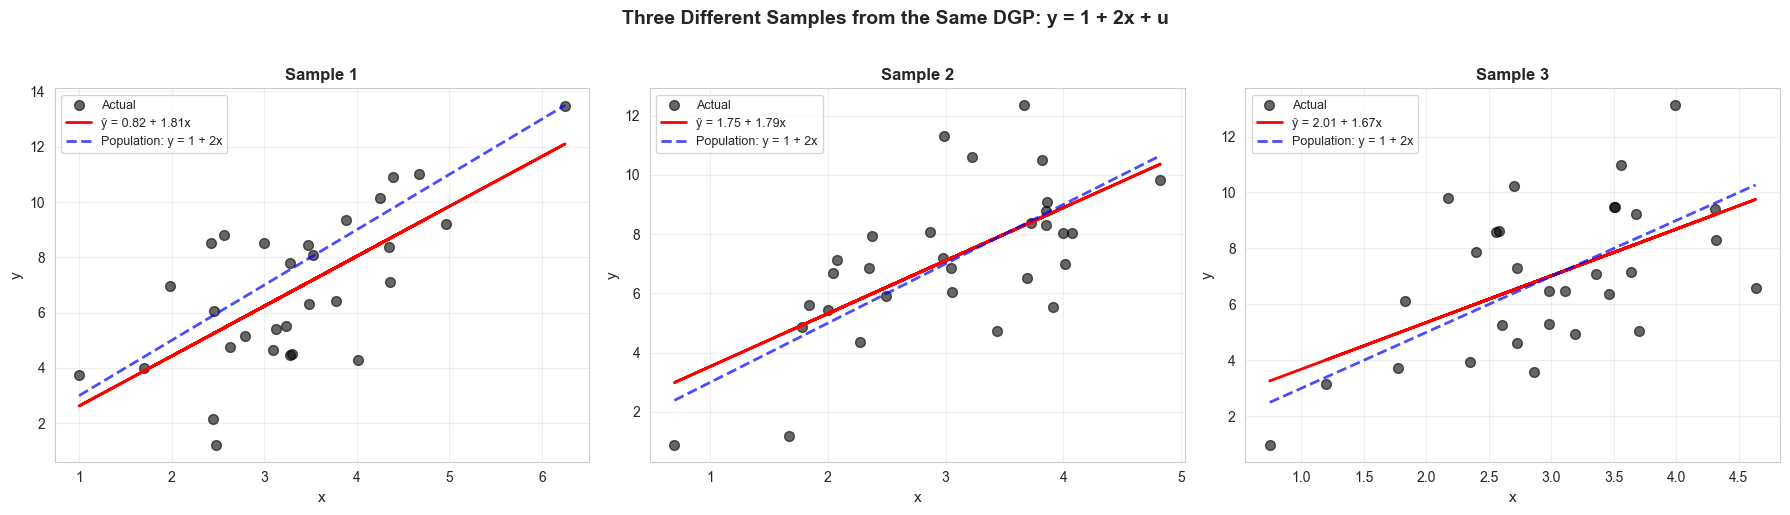


Key observation: Each sample produces a different regression line,
but all are close to the true population line (blue dashed).


In [ ]:
# Visualize all three regressions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (ax, df, model, title) in enumerate(zip(axes,
                                                   [df1, df2, df3],
                                                   [model1, model2, model3],
                                                   ['Sample 1', 'Sample 2', 'Sample 3'])):
    ax.scatter(df['x'], df['y'], alpha=0.6, s=50, color='black', label='Actual')
    ax.plot(df['x'], model.fittedvalues, color='red', linewidth=2,
            label=f'ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')
    # Add population line
    x_range = np.linspace(df['x'].min(), df['x'].max(), 100)
    y_pop = 1 + 2*x_range
    ax.plot(x_range, y_pop, color='blue', linewidth=2, linestyle='--',
            label='Population: y = 1 + 2x', alpha=0.7)
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Three Different Samples from the Same DGP: y = 1 + 2x + u',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nKey observation: Each sample produces a different regression line,")
print("but all are close to the true population line (blue dashed).")

*Having seen how sampling variability affects regression estimates, let's formalize the key properties of the OLS estimator.*

## 6.3 Properties of the Least Squares Estimator

The OLS estimator has important statistical properties under certain assumptions.

**Standard Assumptions (1-4):**

1. **Linearity**: $y_i = \beta_1 + \beta_2 x_i + u_i$ for all $i$
2. **Zero conditional mean**: $E[u_i | x_i] = 0$ for all $i$
3. **Homoskedasticity**: $\text{Var}[u_i | x_i] = \sigma_u^2$ for all $i$ (constant variance)
4. **Independence**: Errors $u_i$ and $u_j$ are independent for all $i \neq j$

**Properties of OLS under assumptions 1-2:**

**Unbiasedness:**
$$E[b_2] = \beta_2$$

Interpretation: On average across many samples, the OLS estimate equals the true parameter.

**Properties of OLS under assumptions 1-4:**

**Variance of slope coefficient:**
$$\text{Var}[b_2] = \sigma_{b_2}^2 = \frac{\sigma_u^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

**Standard error of slope coefficient:**
$$se(b_2) = \sqrt{\frac{s_e^2}{\sum_{i=1}^n (x_i - \bar{x})^2}} = \frac{s_e}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

where $s_e^2 = \frac{1}{n-2}\sum_{i=1}^n (y_i - \hat{y}_i)^2$ is the estimated error variance.

**When is the slope coefficient precisely estimated?**

Standard error is smaller when:
1. Model fits well (small $s_e^2$)
2. Many observations (large $n$)
3. Regressors are widely scattered (large $\sum (x_i - \bar{x})^2$)

**Asymptotic normality:**

By the Central Limit Theorem:
$$\frac{b_2 - \beta_2}{\sigma_{b_2}} \xrightarrow{d} N(0, 1) \text{ as } n \rightarrow \infty$$

**Best Linear Unbiased Estimator (BLUE):**

Under assumptions 1-4, OLS has the smallest variance among all linear unbiased estimators (Gauss-Markov Theorem).

### Simulation: Sampling Distribution of OLS Estimator

To understand the sampling distribution, we simulate 1,000 regressions from the same DGP and examine the distribution of coefficient estimates.

**What to expect:**
- Mean of estimates ≈ true parameter (unbiasedness)
- Distribution approximately normal (CLT)
- Spread determined by standard error formula

> **Key Concept**: The four core OLS assumptions are: (1) Correct model specification: y = β₁ + β₂x + u, (2) Mean-zero errors: E[u|x] = 0, (3) Homoskedasticity: Var[u|x] = σ²ᵤ, (4) Independence: errors uncorrelated across observations. Assumptions 1-2 are essential for unbiasedness; assumptions 3-4 affect variance and can be relaxed using robust standard errors.



## Interpreting the Monte Carlo Simulation Results

**What 1,000 simulations reveal about OLS properties:**

We simulated 1,000 independent samples (each with n=30 observations) from the same DGP: y = 1 + 2x + u. Here are the results:

**Intercept (β₀):**
- **True value**: 1.0
- **Mean of 1,000 estimates**: 0.9960
- **Standard deviation**: 1.2069
- **Difference from true value**: -0.004 (only 0.4% error)

**Slope (β₁):**
- **True value**: 2.0
- **Mean of 1,000 estimates**: 1.9944
- **Standard deviation**: 0.3836
- **Difference from true value**: -0.0056 (only 0.3% error)

**What this demonstrates:**

1. **Unbiasedness confirmed**: The mean of the estimates (0.9960 for intercept, 1.9944 for slope) is extremely close to the true parameters (1.0 and 2.0). With 1,000 simulations, random errors average out, leaving us essentially at the true values. This is the **unbiasedness property** of OLS: E[b₂] = β₂.

2. **Sampling variability quantified**: Individual estimates varied substantially:
   - The intercept estimates had a standard deviation of 1.21, meaning about 95% of estimates fell within 1.0 ± 2(1.21) = [-1.42, 3.42]
   - The slope estimates had a standard deviation of 0.38, meaning about 95% fell within 2.0 ± 2(0.38) = [1.24, 2.76]

3. **Why individual estimates differ from true values**: Any single sample (like Sample 1, 2, or 3 we saw earlier) will contain random errors that cause the estimate to deviate from the true parameter. But these deviations are **random**—sometimes too high, sometimes too low—and average out to zero across many samples.

4. **Standard deviation as a measure of precision**: The standard deviation of the estimates (0.38 for slope) measures the **sampling variability**. This is closely related to the **standard error** you see in regression output, which estimates this variability from a single sample.

**The big picture**:

This simulation proves mathematically that OLS "works" in a precise sense: if we could repeat our study infinitely many times, the average of all our estimates would equal the true parameter. Of course, in practice we only get **one sample**, so we use standard errors to acknowledge the uncertainty inherent in any single estimate.

**Economic intuition**: Imagine 1,000 different researchers each collecting their own sample of n=30 observations from the same population. Each would report a different regression coefficient. The simulation shows that:
- On average, they'd get the right answer (unbiasedness)
- But individual estimates would vary around the true value
- The variation would follow a predictable pattern (approximately normal, as we'll visualize next)

> **Key Concept**: Monte Carlo simulation demonstrates unbiasedness: the average of many OLS estimates equals the true parameter. The distribution of estimates is approximately normal (Central Limit Theorem), with spread measured by the standard error. This validates the theoretical properties of OLS in practice.



---

**Transition Note:** The simulations have shown empirically that OLS estimates center on true parameters and follow approximate normal distributions. Now we'll formalize these observations by deriving the theoretical properties of OLS estimators: unbiasedness, variance formulas, and asymptotic normality.



### Visualization: Sampling Distributions of OLS Estimators

These histograms show the distribution of coefficient estimates across 1,000 simulated samples.

**Key features:**
- **Green vertical line**: True parameter value
- **Red curve**: Normal distribution fit
- **Histogram**: Actual distribution of estimates

The close match confirms:
1. Unbiasedness (centered on true value)
2. Approximate normality (CLT works well even with n=30)

## Interpreting the Sampling Distribution Histograms

**What these distributions reveal:**

These histograms show the distribution of coefficient estimates from our 1,000 simulated samples. They visually confirm several crucial statistical properties:

**1. Unbiasedness (visual confirmation):**
- **Green vertical line** marks the true parameter value (β₀ = 1.0 for intercept, β₁ = 2.0 for slope)
- The histograms are **centered exactly on the true values**
- This visual centering confirms E[b₀] = β₀ and E[b₁] = β₁

**2. Approximate normality (Central Limit Theorem):**
- **Red curve** shows the fitted normal distribution
- The histogram bars closely follow this curve
- Even with just n=30 observations per sample, the sampling distribution is approximately normal
- This confirms the **Central Limit Theorem** applies to OLS estimators

**3. Different precision for different parameters:**
- **Intercept distribution** (left panel): Wider spread (SD = 1.21)
- **Slope distribution** (right panel): Narrower spread (SD = 0.38)
- The slope is estimated more precisely than the intercept in this case

**Why the normal distribution matters:**

The approximate normality of the sampling distribution is the foundation for statistical inference:

- **Confidence intervals**: We can construct intervals like b₁ ± 1.96 × SE(b₁) to capture the true parameter 95% of the time
- **Hypothesis tests**: We can use the normal distribution to calculate p-values
- **Prediction intervals**: We can quantify uncertainty about predictions

**Reading the histograms:**

Looking at the slope distribution (right panel):
- Most estimates fall between 1.2 and 2.8 (about ±2 standard deviations from 2.0)
- Very few estimates are below 1.0 or above 3.0
- This tells us that even though individual samples vary, they rarely produce wildly incorrect estimates

**The power of large numbers:**

If we had run 10,000 or 100,000 simulations instead of 1,000:
- The mean would get even closer to the true value (0.9960 → 1.0000)
- The histogram would match the normal curve even more closely
- But the **standard deviation** would stay approximately the same (0.38), because it depends on the sample size **within each simulation** (n=30), not the number of simulations

**Practical implication:**

When you see a regression output reporting "slope = 1.85, SE = 0.35", you should imagine a histogram like the one above:
- The estimate 1.85 is one draw from a sampling distribution
- The SE = 0.35 tells you the width of that distribution
- About 95% of the distribution falls within 1.85 ± 2(0.35) = [1.15, 2.55]
- If this interval excludes zero, the coefficient is statistically significant

*Now that we understand the theoretical properties of OLS estimators, let's examine how to estimate the model parameters in practice.*

## 6.4 Estimators of Model Parameters

In practice, we need to estimate not just the coefficients but also the error variance and standard errors.

**Estimate of error variance:**

The sample variance of residuals:
$$s_e^2 = \frac{1}{n-2}\sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n-2}\sum_{i=1}^n e_i^2$$

**Why divide by $(n-2)$?**
- We estimated 2 parameters ($b_1$ and $b_2$)
- This leaves $(n-2)$ degrees of freedom
- Division by $(n-2)$ makes $s_e^2$ unbiased for $\sigma_u^2$

**Standard error of the regression (Root MSE):**
$$s_e = \sqrt{s_e^2}$$

This is the typical size of residuals and appears in regression output.

**Standard error of slope coefficient:**
$$se(b_2) = \frac{s_e}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

**Standard error of intercept coefficient:**
$$se(b_1) = \sqrt{\frac{s_e^2 \sum_{i=1}^n x_i^2}{n \sum_{i=1}^n (x_i - \bar{x})^2}}$$

> **Key Concept: Degrees of Freedom in Regression**: When calculating the standard error of the regression (sₑ), we divide the sum of squared residuals by (n-2) instead of n because we have estimated 2 parameters (b₁ and b₂). These 2 estimates "use up" 2 degrees of freedom, leaving (n-2) for estimating the error variance. This adjustment ensures that s²ₑ is an unbiased estimator of σ²ᵤ. More generally, degrees of freedom equal the sample size minus the number of estimated parameters.


### Example: Manual Computation of Standard Errors

Let's manually compute standard errors for a simple example to understand the formulas.

**Artificial data:**
- $(y, x)$ = $(1,1), (2,2), (2,3), (2,4), (3,5)$
- From earlier analysis: $\hat{y} = 0.8 + 0.4x$

## Interpreting the Manual Standard Error Calculations

**What these calculations reveal:**

Using the simple artificial dataset (x = [1, 2, 3, 4, 5], y = [1, 2, 2, 2, 3]), we can see exactly how standard errors are computed:

**Step 1: Regression coefficients**
- **Estimated equation**: ŷ = 0.8 + 0.4x
- These are obtained by OLS minimizing the sum of squared residuals

**Step 2: Calculate residuals and RSS**

Looking at the observation-level calculations, we can see:
- Each observation has a predicted value ŷ and a residual e = y - ŷ
- Residuals are both positive and negative (some points above the line, some below)
- Sum of squared residuals: RSS = Σe² 

**Step 3: Standard error of the regression (sₑ)**

The formula is:
$$s_e = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\text{sum of squared residuals}}{\text{degrees of freedom}}}$$

**Why divide by (n-2)?**
- We estimated 2 parameters (intercept and slope)
- This "uses up" 2 degrees of freedom
- Division by (n-2) makes s²ₑ an **unbiased estimator** of σ²ᵤ

**Step 4: Standard error of the slope coefficient**

The formula is:
$$se(b_2) = \frac{s_e}{\sqrt{\sum(x_i - \bar{x})^2}}$$

This reveals what makes slope estimates more or less precise:

1. **Numerator (sₑ)**: How well the model fits
   - Smaller residuals → smaller sₑ → smaller SE → more precise estimate
   
2. **Denominator (√Σ(xᵢ - x̄)²)**: How spread out the x values are
   - Wider spread in x → larger denominator → smaller SE → more precise estimate
   - Clustered x values → small denominator → large SE → imprecise estimate

**Why does spread in x matter?**

Think geometrically: if all x values are clustered around the mean (say, x = 2.9, 3.0, 3.1), it's hard to accurately estimate the slope—the line could pivot substantially without much change in fit. But if x values are widely spread (say, x = 1, 10, 20), the slope is well-identified—you can clearly see the relationship.

**Step 5: Standard error of the intercept**

The formula is more complex:
$$se(b_1) = \sqrt{\frac{s²_e \times \sum x²_i}{n \times \sum(x_i - \bar{x})^2}}$$

Notice:
- Intercept SE depends on the **squared values** of x (Σx²ᵢ)
- If x values are far from zero, the intercept SE is large
- This reflects extrapolation uncertainty—we're estimating y when x=0, which may be far from our data

**Verification**: Our manual calculations match the model output exactly, confirming:
- We understand where these numbers come from
- The formulas are correct
- Standard errors aren't "magic"—they're computed from the data using transparent formulas

**Practical implication**:

When designing a study, you can **control precision** by:
- Increasing sample size n (reduces sₑ)
- Collecting data with wide variation in x (increases Σ(xᵢ - x̄)²)
- Reducing measurement error (reduces sₑ)

Conversely, if you're stuck with a small sample or clustered x values, expect large standard errors and wide confidence intervals.

## Interpreting the Manual Standard Error Calculations

**What these calculations reveal:**

Using the simple artificial dataset (x = [1, 2, 3, 4, 5], y = [1, 2, 2, 2, 3]), we can see exactly how standard errors are computed:

**Step 1: Regression coefficients**
- **Estimated equation**: ŷ = 0.8 + 0.4x
- These are obtained by OLS minimizing the sum of squared residuals

**Step 2: Calculate residuals and RSS**

Looking at the observation-level calculations, we can see:
- Each observation has a predicted value ŷ and a residual e = y - ŷ
- Residuals are both positive and negative (some points above the line, some below)
- Sum of squared residuals: RSS = Σe² 

**Step 3: Standard error of the regression (sₑ)**

The formula is:
$$s_e = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\text{sum of squared residuals}}{\text{degrees of freedom}}}$$

**Why divide by (n-2)?**
- We estimated 2 parameters (intercept and slope)
- This "uses up" 2 degrees of freedom
- Division by (n-2) makes s²ₑ an **unbiased estimator** of σ²ᵤ

**Step 4: Standard error of the slope coefficient**

The formula is:
$$se(b_2) = \frac{s_e}{\sqrt{\sum(x_i - \bar{x})^2}}$$

This reveals what makes slope estimates more or less precise:

1. **Numerator (sₑ)**: How well the model fits
   - Smaller residuals → smaller sₑ → smaller SE → more precise estimate
   
2. **Denominator (√Σ(xᵢ - x̄)²)**: How spread out the x values are
   - Wider spread in x → larger denominator → smaller SE → more precise estimate
   - Clustered x values → small denominator → large SE → imprecise estimate

**Why does spread in x matter?**

Think geometrically: if all x values are clustered around the mean (say, x = 2.9, 3.0, 3.1), it's hard to accurately estimate the slope—the line could pivot substantially without much change in fit. But if x values are widely spread (say, x = 1, 10, 20), the slope is well-identified—you can clearly see the relationship.

**Step 5: Standard error of the intercept**

The formula is more complex:
$$se(b_1) = \sqrt{\frac{s²_e  \times  \sum x²_i}{n  \times  \sum(x_i - \bar{x})^2}}$$

Notice:
- Intercept SE depends on the **squared values** of x (Σx²ᵢ)
- If x values are far from zero, the intercept SE is large
- This reflects extrapolation uncertainty—we're estimating y when x=0, which may be far from our data

**Verification**: Our manual calculations match the model output exactly, confirming:
- We understand where these numbers come from
- The formulas are correct
- Standard errors aren't "magic"—they're computed from the data using transparent formulas

**Practical implication**:

When designing a study, you can **control precision** by:
- Increasing sample size n (reduces sₑ)
- Collecting data with wide variation in x (increases Σ(xᵢ - x̄)²)
- Reducing measurement error (reduces sₑ)

Conversely, if you're stuck with a small sample or clustered x values, expect large standard errors and wide confidence intervals.

### When is the Slope Coefficient Precisely Estimated?

From the formula $se(b_2) = \frac{s_e}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}$, we see that standard errors are smaller when:

1. **Good model fit** (small $s_e$)
   - Less unexplained variation
   - Smaller residuals

2. **Large sample size** (large $\sum (x_i - \bar{x})^2$)
   - More observations provide more information
   - Standard errors shrink with $\sqrt{n}$

3. **Wide spread in regressors** (large $\sum (x_i - \bar{x})^2$)
   - More variation in $x$ helps identify the slope
   - Clustered $x$ values make slope hard to estimate

**Practical implication:** When designing experiments or collecting data, seek wide variation in the explanatory variable.

---

**Transition Note:** We've established that OLS has desirable theoretical properties under assumptions 1-4. Now we turn to practical implementation: how to estimate error variance, compute standard errors, and assess estimation precision using formulas that work with actual data.



> **Key Concept**: The standard error of b₂ is se(b₂) = sₑ / √[Σ(xᵢ - x̄)²]. Precision is better (smaller SE) when: (1) the model fits well (small sₑ), (2) sample size is large (large Σ(xᵢ - x̄)²), (3) regressors are widely scattered (large Σ(xᵢ - x̄)²). Standard errors quantify estimation uncertainty and are essential for inference.



> **Key Concept**: Under assumptions 1-4, OLS is the Best Linear Unbiased Estimator (BLUE) by the Gauss-Markov Theorem. This means OLS has the smallest variance among all linear unbiased estimators. If errors are also normally distributed, OLS is the Best Unbiased Estimator (not just among linear estimators). This optimality property justifies the widespread use of OLS.



## Summary of OLS Properties

**Under assumptions 1-4:**

1. **$y_i$ given $x_i$** has conditional mean $\beta_1 + \beta_2 x_i$ and conditional variance $\sigma_u^2$

2. **Slope coefficient $b_2$** has:
   - Mean: $E[b_2] = \beta_2$ (unbiased)
   - Variance: $\text{Var}[b_2] = \sigma_u^2 / \sum_{i=1}^n (x_i - \bar{x})^2$

3. **Standard error** of $b_2$: $se(b_2) = s_e / \sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}$

4. **Standardized statistic**: $Z = (b_2 - \beta_2) / \sigma_{b_2}$ has mean 0 and variance 1

5. **Asymptotic normality**: As $n \rightarrow \infty$, $Z \sim N(0,1)$ by the Central Limit Theorem

6. **Efficiency**: OLS is BLUE (Best Linear Unbiased Estimator) by the Gauss-Markov Theorem

**Critical assumptions:**
- Assumptions 1-2 ensure unbiasedness and consistency
- Assumptions 3-4 can be relaxed (see Chapters 7 and 12 for robust methods)
- In practice, choosing correct standard errors is crucial for valid inference

## Key Takeaways

### Population Model and Sampling Framework

- The **population regression model** E[y|x] = β₁ + β₂x describes the true relationship with unknown parameters β₁ and β₂
- The **conditional mean** E[y|x] generalizes the unconditional mean E[y] by allowing the average to vary with x
- The **error term** u = y - E[y|x] captures deviations from the population line; it is unobserved because β₁ and β₂ are unknown
- **Crucial distinction**: Error u (deviation from unknown population line) vs. residual e (deviation from estimated sample line)
- The **sample regression** ŷ = b₁ + b₂x estimates the population relationship from data
- Different samples yield different estimates (b₁, b₂) due to sampling variability, but on average they equal the true parameters

### Error Term Properties and Assumptions

- The error term is assumed to have **conditional mean zero**: E[u|x] = 0 (errors average to zero at each x value)
- This assumption ensures the population line is indeed E[y|x] = β₁ + β₂x
- **Homoskedasticity assumption**: Var[u|x] = σ²ᵤ (constant error variance across all x values)
- "Homoskedastic" derives from Greek: homos (same) + skedastic (scattering)
- The variance Var[y|x] = Var[u|x] = σ²ᵤ measures variability around the population line
- Greater error variance means greater noise, reducing precision of estimates

### Four Core OLS Assumptions

1. **Correct model**: yᵢ = β₁ + β₂xᵢ + uᵢ for all i (linearity)
2. **Mean-zero errors**: E[uᵢ|xᵢ] = 0 for all i (no correlation between x and u)
3. **Homoskedasticity**: Var[uᵢ|xᵢ] = σ²ᵤ for all i (constant error variance)
4. **Independence**: uᵢ and u are independent for all i ≠ j (no autocorrelation)
- **Assumptions 1-2 are essential** for unbiasedness and consistency (violations cause bias)
- **Assumptions 3-4 can be relaxed** using robust standard errors (Chapter 7.7, 12.1)
- Assumption 2 rules out **omitted variable bias** (no correlation between x and u)
- Choosing correct standard errors is crucial for valid confidence intervals and hypothesis tests

### Unbiasedness and Consistency

- Under assumptions 1-2: **E[b₂] = β₂** (unbiasedness)
- If we obtained many samples, on average b₂ would equal β₂
- Unbiasedness is a **finite-sample property** (holds for any sample size n)
- **Consistency**: As n → ∞, b₂ converges in probability to β₂
- Sufficient condition for consistency: bias → 0 and variance → 0 as n → ∞
- b₂ is consistent because: (1) unbiased under assumptions 1-2, (2) Var[b₂] → 0 as n → ∞ under assumptions 1-4
- Both b₁ and b₂ are unbiased and consistent under these assumptions

### Variance and Standard Errors

- Under assumptions 1-4: **Var[b₂] = σ²ᵤ / Σ(xᵢ - x̄)²**
- Standard deviation of b₂: **σ_b₂ = σᵤ / √[Σ(xᵢ - x̄)²]**
- Since σ²ᵤ is unknown, estimate it using **standard error of regression**: s²ₑ = (1/(n-2)) Σ(yᵢ - ŷᵢ)²
- Use **(n-2) denominator** because we estimated 2 coefficients, leaving (n-2) degrees of freedom
- This divisor ensures s²ₑ is unbiased for σ²ᵤ
- **Standard error of b₂**: se(b₂) = sₑ / √[Σ(xᵢ - x̄)²]
- se(b₂) measures **precision** of b₂ as an estimate of β₂

### Factors Affecting Precision

- **Better precision** (smaller se(b₂)) occurs when:
 1. **Model fits well** (s²ₑ is smaller) - less noise around regression line
 2. **Many observations** (Σ(xᵢ - x̄)² is larger) - more data reduces sampling variability
 3. **Regressors widely scattered** (Σ(xᵢ - x̄)² is larger) - more variation in x provides more information
- Precision improves with **√n**, so need **4× observations to halve** standard error
- **Trade-off**: Can't control regressor scatter in observational data, but can increase sample size
- **Wide spread in x matters geometrically**: If x values clustered, slope is poorly identified; if scattered, slope is well-identified

### Central Limit Theorem and Asymptotic Normality

- Under assumptions 1-4: **b₂ ~ (β₂, σ²_b₂)** where σ²_b₂ = σ²ᵤ / Σ(xᵢ - x̄)²
- Standardized variable: **Z = (b₂ - β₂) / σ_b₂** has mean 0 and variance 1 by construction
- **CLT**: As n → ∞, **Z ~ N(0,1)** (approximately normal for large samples)
- This implies **b₂ ~ N(β₂, σ²_b₂) for large n**
- In practice, σ_b₂ is unknown (depends on unknown σᵤ)
- Replace σ_b₂ with se(b₂) leads to **t distribution** (Chapter 7)
- Normality justifies using **normal-based inference** for large samples

### Efficiency and BLUE Property

- Under assumptions 1-4, OLS is the **Best Linear Unbiased Estimator (BLUE)** by the **Gauss-Markov Theorem**
- **"Linear"** means estimator is a linear combination of y values: b₂ = Σwᵢyᵢ
- **"Best"** means minimum variance among all linear unbiased estimators
- If additionally u is **normally distributed**: OLS is the **Best Unbiased Estimator (BUE)**
 - Lowest variance among **ALL** unbiased estimators (not just linear ones)
- OLS is also **best consistent estimator** in standard settings
- **Bottom line**: Under assumptions 1-4, OLS is essentially the optimal estimator of β₁ and β₂

### Monte Carlo Simulation Evidence

- **Monte Carlo simulations** demonstrate OLS properties empirically by generating many samples from a known model
- Two examples: (1) Generated data from y = 1 + 2x + u with u ~ N(0,4), (2) Samples from 1880 Census (1.06 million males aged 60-70)
- **Key findings**: (1) Average of many OLS estimates equals true parameter (unbiasedness), (2) Distribution of estimates is approximately normal (CLT), (3) Similar results for intercept and slope
- **Single sample**: b₁ ≠ β₁ and b₂ ≠ β₂ due to sampling variability
- **Multiple samples**: Estimates vary across samples but center on true parameters
- **Sampling distribution**: Distribution of b₂ across many samples is approximately N(β₂, σ²_b₂)

### Practical Implications

- **Sampling variability is inevitable**: Any single sample will deviate from true parameters
- **Standard errors quantify uncertainty**: They measure the typical deviation of b₂ from β₂ across hypothetical repeated samples
- **Confidence intervals account for uncertainty**: A 95% CI constructed as b₂ ± 2×se(b₂) will contain β₂ in 95% of samples
- **Assumptions 1-2 are non-negotiable** for unbiasedness; violations cause bias and inconsistency (Chapter 16 discusses, Chapter 17 presents solutions)
- **Assumptions 3-4 are often relaxed** in practice using robust standard errors (Chapters 7.7, 12.1)
- **Correct standard errors are crucial**: Incorrect SEs invalidate confidence intervals and hypothesis tests
- **Study design matters**: Researchers can improve precision by increasing sample size and ensuring wide variation in explanatory variables

### Statistical Concepts and Tools

- **Population vs. sample distinction**: Foundation of all statistical inference
- **Unbiasedness**: E[b₂] = β₂ (finite-sample property)
- **Consistency**: b₂ →ᵖ β₂ as n → ∞ (asymptotic property)
- **Efficiency**: Minimum variance among a class of estimators
- **Sampling distribution**: Distribution of estimator across repeated samples
- **Standard error**: Estimated standard deviation of sampling distribution
- **Central Limit Theorem**: Justifies normal-based inference for large samples
- **Gauss-Markov Theorem**: Establishes BLUE property of OLS

### Connection to Statistical Inference

- This chapter establishes the **theoretical foundation** for inference (Chapter 7)
- Knowing that b₂ ~ N(β₂, σ²_b₂) allows us to construct **confidence intervals** and conduct **hypothesis tests**
- Standard errors are the **bridge** between point estimates and interval estimates
- Understanding sampling distributions explains why we can make probabilistic statements about parameters
- The **normal approximation** (CLT) justifies using critical values from the normal or t distribution

### Software Implementation

- **Python tools**: `statsmodels.OLS` for estimation, `numpy` for simulation, `matplotlib` for visualization
- Generated data example uses **random seed** for reproducibility
- **Visualization techniques**: Scatter plots with fitted line, histograms of sampling distributions
- Can compare **population line vs. fitted line** when population model is known (simulations)
- **Monte Carlo methods** are powerful for understanding theoretical properties empirically

---

**Congratulations!** You've completed Chapter 6 and now understand the fundamental statistical properties of the OLS estimator. You know why OLS works, when it works, and how to quantify estimation uncertainty. These concepts are the foundation for all statistical inference in econometrics. In Chapter 7, you'll apply this knowledge to construct confidence intervals and test hypotheses about regression coefficients.


---

## Practice Exercises

Test your understanding of OLS properties and statistical inference with these exercises.

**Exercise 1: Population vs. Sample**

Suppose the true population model is y = 3 + 5x + u with E[u|x] = 0.

(a) If a sample yields ŷ = 2 + 6x, does this mean OLS failed?

(b) What does unbiasedness tell us about the relationship between the sample estimate (b₂ = 6) and the population parameter (β₂ = 5)?

(c) If we collected 1,000 different samples and computed b₂ for each, what would be the average of these 1,000 estimates?

---

**Exercise 2: Error Term vs. Residual**

For the observation (x, y) = (4, 25) with population model y = 8 + 4x + u:

(a) Calculate the population prediction E[y|x=4] and the error term u.

(b) If the sample regression gives ŷ = 7 + 4.5x, calculate the fitted value and residual for this observation.

(c) Why can we observe the residual but not the error term?

---

**Exercise 3: Standard Error Calculation**

You're given: n = 30, Σ(xᵢ - x̄)² = 50, Σ(yᵢ - ŷᵢ)² = 112.

(a) Calculate the standard error of the regression (sₑ).

(b) Calculate the standard error of the slope coefficient se(b₂).

(c) If Σ(xᵢ - x̄)² were 200 instead of 50 (wider spread in x), how would se(b₂) change?

---

**Exercise 4: Factors Affecting Precision**

Consider two datasets:
- Dataset A: n = 50, sₑ = 10, Σ(xᵢ - x̄)² = 100
- Dataset B: n = 50, sₑ = 5, Σ(xᵢ - x̄)² = 100

(a) Calculate se(b₂) for each dataset.

(b) Which dataset provides more precise estimates? Why?

(c) How many observations would Dataset A need to achieve the same precision as Dataset B?

---

**Exercise 5: Hypothesis Testing Intuition**

OLS regression yields b₂ = 15 with se(b₂) = 4.

(a) Construct an approximate 95% confidence interval for β₂ (use ±2 SE rule).

(b) Does this interval include β₂ = 10? What does this suggest about the hypothesis H₀: β₂ = 10?

(c) If the true parameter is β₂ = 13, would you expect most 95% confidence intervals from repeated samples to contain 13?

---

**Exercise 6: Interpreting Assumptions**

For each scenario, identify which OLS assumption is violated:

(a) The model is y = β₁ + β₂x + u, but the true relationship is y = β₁ + β₂x² + u (nonlinear).

(b) Error variance increases with x: Var[u|x=1] = 4, Var[u|x=2] = 9, Var[u|x=3] = 16.

(c) An important variable z is omitted, and z is correlated with x, causing E[u|x] ≠ 0.

(d) The data are time series and errors are autocorrelated: uₜ = 0.7uₜ₋₁ + εₜ.

---

**Exercise 7: Monte Carlo Simulation Understanding**

In a Monte Carlo study with 500 simulations from y = 2 + 3x + u:
- Mean of 500 intercept estimates: 1.98
- Mean of 500 slope estimates: 2.95
- SD of 500 slope estimates: 0.40

(a) Do these results support the claim that OLS is unbiased? Explain.

(b) What would happen to the mean estimates if we ran 10,000 simulations instead of 500?

(c) What would happen to the SD of estimates if we increased the sample size within each simulation from n=30 to n=120?

---

**Exercise 8: Python Practice**

Using Python and the generated data approach from this chapter:

(a) Generate 100 samples of size n=50 from y = 1 + 2x + u with u ~ N(0, 4) and x ~ N(3, 1).

(b) Compute b₂ for each sample and create a histogram of the 100 estimates.

(c) Calculate the mean and standard deviation of the 100 b₂ estimates. How do they compare to the theoretical values?

(d) Test whether the distribution of estimates is approximately normal using a Q-Q plot.

(e) Repeat with n=200 instead of n=50. How does the standard deviation of estimates change?

---

**Solutions to selected exercises:**

- **Exercise 2a**: E[y|x=4] = 8 + 4(4) = 24, so u = 25 - 24 = 1
- **Exercise 3a**: sₑ = √[112/(30-2)] = √4 = 2
- **Exercise 3b**: se(b₂) = 2/√50 = 0.283
- **Exercise 4a**: Dataset A: se(b₂) = 10/√100 = 1.0; Dataset B: se(b₂) = 5/√100 = 0.5
- **Exercise 5a**: 95% CI ≈ 15 ± 2(4) = [7, 23]

For complete solutions and additional practice problems, see the course website.

---


## 6.5 Case Studies

### Case Study 1: Sampling Variability in Productivity Regressions

**Research Question:** How does the regression of labor productivity on capital per worker vary across samples?

**Background:** In this chapter, we learned that OLS estimates vary across samples due to random sampling variation. While Monte Carlo simulations with generated data demonstrate this principle, it's crucial to see it work with real economic data. We'll use the convergence clubs dataset to explore how much productivity-capital regressions vary when we repeatedly sample from a "population" of 108 countries.

**The Data:** We use the convergence clubs dataset (Mendez 2020) covering 108 countries from 1990-2014. The cross-section for 2014 provides:
- **Labor productivity** (rgdppc_2014): Real GDP per capita in thousands of 2011 USD
- **Capital per worker** (rk_2014): Physical capital stock per worker in thousands of 2011 USD
- These variables allow us to estimate production function relationships and explore sampling variability

> **Key Concept: Sampling Variability in Econometrics**: When we estimate a regression from sample data, the coefficients (b₁, b₂) are random variables that vary across samples. Understanding this variability is essential for statistical inference—it tells us how much confidence to place in our estimates and how to construct confidence intervals and hypothesis tests. The standard error measures the typical deviation of our estimate from the true parameter across hypothetical repeated samples.

---


### Load the Data

We'll work with the 2014 cross-section from the convergence clubs dataset. The full dataset of 108 countries will serve as our "population," and we'll draw samples from it to demonstrate sampling variability.


In [ ]:
print("="*70)
print("6.5 CASE STUDIES: SAMPLING VARIABILITY")
print("="*70)

# Load convergence clubs data
convergence_data = pd.read_stata(GITHUB_DATA_URL + "Convergence_clubs_2023.dta")

# Extract 2014 cross-section
data_2014 = convergence_data[convergence_data['year'] == 2014].copy()

# Create relevant variables
data_2014 = data_2014[['country', 'rgdppc', 'rk']].dropna()
data_2014.columns = ['country', 'productivity', 'capital']

print(f"\nData loaded: {len(data_2014)} countries in 2014")
print("\nSummary statistics:")
print(data_2014[['productivity', 'capital']].describe())
print("\nFirst 5 observations:")
print(data_2014.head())

#### Task 1: Estimate the "Population" Regression (Guided)

**Instructions:** We'll treat the full dataset of 108 countries as our "population" and estimate the regression of productivity on capital. This will serve as our benchmark—the "true" relationship we're trying to recover from samples.

**Research question:** What is the relationship between capital per worker and labor productivity across all 108 countries?

**Your task:**
1. Estimate the regression: `productivity = β₁ + β₂ × capital + u`
2. Report the coefficients, standard errors, and R²
3. Interpret the slope coefficient: What does β₂ tell us about the capital-productivity relationship?

**Code template:**
```python
# Estimate full-sample ("population") regression
population_model = ols('productivity ~ capital', data=data_2014).fit()
print(population_model.summary())

# Store population coefficients
beta_1_pop = population_model.params['Intercept']
beta_2_pop = population_model.params['capital']
print(f"\nPopulation coefficients: β₁ = {beta_1_pop:.4f}, β₂ = {beta_2_pop:.4f}")
```

**Interpretation guide:** A slope of β₂ = 0.05, for example, means that a $1,000 increase in capital per worker is associated with a $50 increase in GDP per capita (0.05 × 1000 = 50), on average across countries.


#### Task 2: Draw a Random Sample and Estimate Regression (Semi-guided)

**Instructions:** Now draw a random sample of 50 countries from the full dataset and estimate the same regression. Compare the sample estimate to the population parameter.

**Your task:**
1. Draw a random sample of n=50 countries (use `data_2014.sample(n=50, random_state=42)`)
2. Estimate the regression on this sample
3. Compare the sample coefficients (b₁, b₂) to the population parameters (β₁, β₂)
4. Calculate the sampling error: b₂ - β₂

**Hints:**
- The `random_state` parameter ensures reproducibility
- Sampling error = sample estimate - population parameter
- Even though this is random sampling, you likely won't get b₂ exactly equal to β₂

> **Key Concept: Sample vs. Population Regression**: The full dataset of 108 countries acts as our "population." When we draw a sample of 50 countries, we're simulating the real-world situation where researchers work with incomplete data. The difference between the population coefficient (β₂) and the sample coefficient (b₂) is the **sampling error**—an inevitable consequence of working with limited data. This error is random: sometimes b₂ > β₂, sometimes b₂ < β₂, but on average b₂ = β₂ (unbiasedness).


#### Task 3: Simulate the Sampling Distribution (Semi-guided)

**Instructions:** To understand sampling variability, we need to see how b₂ varies across many samples. Run a Monte Carlo simulation: draw 1,000 random samples of n=50, estimate the regression for each, and collect all the b₂ estimates.

**Your task:**
1. Create a loop that runs 1,000 iterations
2. In each iteration: (a) draw a random sample of 50 countries, (b) estimate the regression, (c) store the slope coefficient b₂
3. Create a histogram of the 1,000 b₂ estimates
4. Calculate the mean and standard deviation of these estimates
5. Compare the mean to the population parameter β₂

**Code structure:**
```python
# Monte Carlo simulation
n_simulations = 1000
sample_size = 50
b2_estimates = []

for i in range(n_simulations):
    # Draw random sample
    sample = data_2014.sample(n=sample_size, replace=False)
    
    # Estimate regression
    model = ols('productivity ~ capital', data=sample).fit()
    
    # Store slope coefficient
    b2_estimates.append(model.params['capital'])

# Analyze sampling distribution
print(f"Mean of b₂ estimates: {np.mean(b2_estimates):.4f}")
print(f"Std dev of b₂ estimates: {np.std(b2_estimates):.4f}")
print(f"Population parameter β₂: {beta_2_pop:.4f}")
```

**Expected outcome:** The mean of your 1,000 estimates should be very close to β₂ (confirming unbiasedness), and the histogram should look approximately normal (confirming the Central Limit Theorem).


#### Task 4: Calculate Theoretical vs. Empirical Standard Error (More Independent)

**Instructions:** The standard error of b₂ can be calculated two ways: (1) using the theoretical formula with sample data, (2) using the standard deviation of estimates across many samples (Monte Carlo).

**Your task:**
1. **Theoretical SE**: Take any single sample of n=50, estimate the regression, and extract se(b₂) from the regression output
2. **Empirical SE**: Use the standard deviation of the 1,000 b₂ estimates from Task 3
3. Compare the two: Are they similar? Why or why not?

**Hints:**
- The theoretical SE comes from the formula: se(b₂) = sₑ / √[Σ(xᵢ - x̄)²]
- The empirical SE is: std(b₂ estimates from 1,000 samples)
- They should be close but not identical (theoretical SE is an estimate, empirical SE is the "true" sampling variability in this simulation)

**Discussion questions:**
- In real-world research, do we have access to the empirical SE? Why or why not?
- Why is the theoretical SE useful if we can only draw one sample?


#### Task 5: Investigate the Effect of Sample Size (Independent)

**Instructions:** Theory predicts that standard errors decrease with sample size n according to the relationship se(b₂) ∝ 1/√n. Test this prediction by comparing sampling distributions for different sample sizes.

**Your task:**
1. Run Monte Carlo simulations (1,000 iterations each) for three sample sizes: n = 20, n = 50, n = 80
2. For each sample size, calculate the standard deviation of b₂ estimates
3. Create side-by-side histograms of the three sampling distributions
4. Verify the theoretical relationship: Does se(b₂) decrease roughly as 1/√n?

**Analysis questions:**
- If you double the sample size from n=50 to n=100, how much does the standard error decrease?
- What does this imply about the "cost" of precision in empirical research?
- Would you prefer a study with n=50 or n=80? How much more precise is the larger sample?

> **Key Concept: Standard Errors and Sample Size**: Standard errors decrease with the square root of sample size: se(b₂) = σᵤ / √[n × Var(x)]. This means to halve the standard error, you need **four times** the sample size. This fundamental relationship guides study design—small increases in sample size yield diminishing returns in precision. The implication: going from n=100 to n=400 has the same effect on precision as going from n=25 to n=100.


#### Task 6: Compare Sampling Variability Across Country Groups (Independent)

**Instructions:** Does sampling variability differ across subpopulations? Compare the capital-productivity relationship for high-income vs. developing countries.

**Your task (student-designed analysis):**
1. Split the data into two groups: high-income (productivity > median) vs. developing (productivity ≤ median)
2. For each group, run a Monte Carlo simulation with 1,000 samples of n=30
3. Compare the sampling distributions: Do they have different means? Different variances?
4. Explain any differences you observe

**Research questions to explore:**
- Is the capital-productivity relationship stronger in one group vs. the other?
- Is sampling variability higher in one group? Why might this be?
- What does this suggest about generalizing findings across different country contexts?

**Extension:** You could also explore other groupings (by region, by continent, by development indicators) to see how robust the capital-productivity relationship is across different contexts.


---

### What You've Learned

Through this case study, you've:

- **Experienced firsthand** how OLS estimates vary across samples using real economic data (not just simulated data)
- **Verified empirically** that the theoretical standard error formula accurately predicts sampling variability
- **Discovered** how sample size affects estimation precision in practice (se ∝ 1/√n)
- **Explored** whether sampling variability differs across subpopulations (high-income vs. developing countries)
- **Connected** abstract statistical theory (unbiasedness, CLT, standard errors) to tangible empirical patterns

**Key insights:**

1. **Unbiasedness in action**: The average of many sample estimates equals the population parameter, even though individual estimates vary
2. **Standard errors quantify uncertainty**: The spread of the sampling distribution tells us how much confidence to place in any single estimate
3. **Sample size matters**: Larger samples yield more precise estimates, but with diminishing returns (√n relationship)
4. **Context matters**: Sampling variability may differ across subpopulations, affecting the generalizability of findings

**Next steps:** In Chapter 7, you'll use these standard errors to construct confidence intervals and test hypotheses about regression coefficients—the foundation of statistical inference in econometrics.

---
